# Enhancing Decision Trees with Bagging: An Introduction (Optional Section)

## Bagging the Strength of Decision Trees: An Introduction

Decision trees, a common tool in machine learning, face challenges related to high variance. This occurs when the outcomes of decision trees built on randomly split subsets of training data significantly differ. To address this, "Bootstrap Aggregation" (Bagging) is employed, aiming to enhance the stability and accuracy of models, particularly decision trees {cite:p}`james2023introduction`.

Bagging involves generating multiple replicas of the original training dataset through random sampling with replacement, creating "bootstrap samples." These samples serve as the training data for individual decision trees. The resulting models, known as "base learners", are aggregated to make predictions. The final prediction is often based on an average or majority vote of the individual predictions, addressing issues like variance and overfitting that can arise in standalone models {cite:p}`james2023introduction`. Essentially, bagging introduces diversity into training data by creating various versions through bootstrapping. This diversity, combined with the consolidated predictions of different models, leads to more robust and accurate predictions {cite:p}`james2023introduction`.

Consider a set of independent observations denoted as $Z_1, \ldots, Z_n$, each with a certain level of variability ($\sigma^2$). Averaging these observations reduces the variance of the mean $\bar{Z}$ to $\sigma^2/n$." This averaging helps to decrease variation. To achieve this in the context of statistical learning methods, multiple training sets are generated from the same data pool. Each set undergoes separate model building, and their predictions are averaged. Practically obtaining numerous distinct training sets is challenging, and this is where bootstrapping becomes crucial. Bootstrapping involves drawing samples from a single training set repeatedly, creating different bootstrapped training sets. Models are trained on each of these sets, and their predictions are averaged to create the ultimate ensemble model {cite:p}`james2023introduction`.

Mathematically, the process is expressed as:

\begin{equation}
\hat{f}_{avg} = \frac{1}{B}\sum_{b = 1}^{B} \hat{f}^{b} (x).
\end{equation}

However, obtaining numerous distinct training sets is challenging. Bootstrapping addresses this challenge by repeatedly drawing samples from a single training set, creating different bootstrapped training sets. Models are trained on each of these sets, and their predictions are averaged to create the final ensemble model:

\begin{equation}
\hat{f}_{bag} = \frac{1}{B}\sum_{b = 1}^{B} \hat{f}^{*b} (x).
\end{equation}


`````{admonition} Summary
:class: tip
Bagging, or Bootstrap Aggregation, is a technique in machine learning that improves decision trees.

1. **Creating Copies of Data:**
   - Bagging starts by making multiple copies of the original training data. This is done through random sampling, allowing some data points to be repeated, creating what's called "bootstrap samples."

2. **Training Individual Decision Trees:**
   - Each copy (bootstrap sample) becomes the training data for a separate decision tree. These trees are referred to as "base learners."

3. **Combining Predictions:**
   - The predictions from all these individual trees are combined or averaged to make a final prediction. This can help correct errors or uncertainties that might occur in a single decision tree.

4. **Addressing Issues:**
   - Bagging tackles common problems like high variance and overfitting, which can happen when relying on a single model. By using multiple models and combining their predictions, it provides a more stable and accurate result.

In simpler terms, bagging adds diversity to the training process by creating different versions of the data. This diversity, combined with the wisdom of multiple models, results in predictions that are more reliable and accurate.

`````

## Out-of-Bag Error Estimation

Out-of-Bag (OOB) error estimation is a technique commonly used in bagging, which stands for Bootstrap Aggregating. Bagging is an ensemble machine learning technique that aims to improve the predictive performance of models by creating multiple instances of the same base model, each trained on different subsets of the training data. OOB error estimation provides an efficient way to estimate the model's performance without the need for a separate validation set or cross-validation {cite:p}`pedregosa2011scikit,james2023introduction,sklearnUserGuide`.

Here's how out-of-bag error estimation works:

1. **Data Preparation:**
   - The training dataset contains a set of samples (data points) and their corresponding labels.
   - During each iteration of creating a base model, a random subset of the training data is drawn with replacement. This subset is known as a bootstrap sample.

2. **Bootstrap Aggregating (Bagging):**
   - Multiple instances of a base model (e.g., decision trees) are trained using different bootstrap samples.
   - Around two-thirds (approximately 63.2%) of the data is used for training each base model, leaving the remaining one-third as OOB observations for that particular model.

3. **Out-of-Bag Predictions:**
   - For each base model, the OOB observations (data points that were not included in that model's bootstrap sample) are used as a validation set.
   - The base model predicts the labels for these OOB observations.

4. **Aggregating Predictions:**
   - Once all the base models are trained, and their OOB predictions are collected, these predictions are aggregated in some way. For classification tasks, this could involve majority voting, and for regression tasks, it might involve averaging.

5. **Error Estimation:**
   - The aggregated predictions for the OOB observations are compared with their actual labels to compute an error metric. This error metric, known as the OOB error, provides an estimate of how well the model will generalize to unseen data.
   - The OOB error can be used as an alternative to techniques like cross-validation to assess the model's performance.

<font color='Blue'><b>Example - Estimating Out-of-Bag Error for Iris Flower Classification:</b></font> In this scenario, a data scientist is tasked with a classification problem focused on iris flowers—specifically, classifying them into setosa, versicolor, and virginica. To improve the accuracy of the classification model, the data scientist opts for bagging, an ensemble technique involving the training of multiple instances of a base classifier on different subsets of the training data, followed by the aggregation of their predictions {cite:p}`pedregosa2011scikit,breiman2017classification,sklearnUserGuide`.

The data scientist has access to the widely-used Iris dataset, containing measurements of iris flower features such as sepal length, sepal width, petal length, and petal width, commonly utilized for practicing machine learning techniques.

Here's a step-by-step overview of the process:

1. **Dataset Preparation:**
   - The data scientist loads the Iris dataset, which comprises samples of iris flowers along with their corresponding features and labels.
   - The dataset is then split into training and testing sets to evaluate the model's performance.

2. **Bagging Ensemble:**
   - For the bagging ensemble, the data scientist selects the decision tree classifier as the base model.
   - An ensemble of 100 decision trees is created, with each tree trained on a distinct bootstrap sample of the training data.
   - During the training process, approximately two-thirds of the samples are randomly chosen (bootstrapped) for each tree, leaving the remaining one-third as out-of-bag observations (OOB).

3. **Training the Ensemble:**
   - The data scientist trains the bagging ensemble on the training data, enabling it to learn from the diverse bootstrapped samples.

4. **Out-of-Bag Error Estimation:**
   - Each decision tree in the ensemble possesses its set of OOB observations—instances not included in its bootstrapped sample.
   - Predictions are made using these OOB observations for each tree.
   - The OOB predictions from all trees are aggregated.
   - The data scientist calculates the OOB error by comparing the aggregated predictions with the true labels of the OOB observations.
   - The OOB error provides an estimate of how well the ensemble will generalize to new, unseen data.

5. **Results:**
   - Post-execution, the data scientist determines that the estimated out-of-bag error is approximately 0.0571, corresponding to about 5.71% misclassified OOB observations.
   - This estimate offers valuable insights into the model's performance without the need for a separate validation set or cross-validation.


In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a bagged ensemble of decision trees
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(base_model, n_estimators=100, oob_score=True, random_state=42)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Estimate the OOB error
oob_error = 1 - bagging_model.oob_score_
print(f"Out-of-Bag Error: {oob_error:.4f}")

Out-of-Bag Error: 0.0571


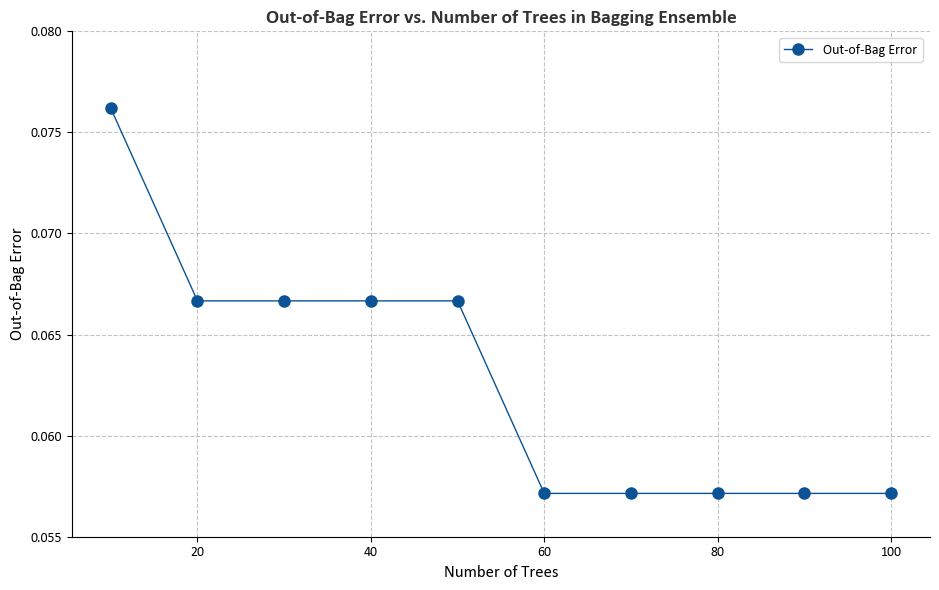

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('../mystyle.mplstyle')

# Vary the number of trees in the ensemble
tree_numbers = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store results
oob_errors = []

# Iterate over different numbers of trees
for n_trees in tree_numbers:
    # Create a bagged ensemble of decision trees
    bagging_model = BaggingClassifier(base_model, n_estimators=n_trees, oob_score=True, random_state=42)
    
    # Train the bagging model
    bagging_model.fit(X_train, y_train)
    
    # Estimate the OOB error
    oob_error = 1 - bagging_model.oob_score_
    oob_errors.append(oob_error)

# Create fig and ax for better control
fig, ax = plt.subplots(figsize=(9.5, 6))

# Plotting the results with improved formatting
ax.plot(tree_numbers, oob_errors, marker='o', linestyle='-', color='#0b5394', label='Out-of-Bag Error', markersize=8)
ax.set_title('Out-of-Bag Error vs. Number of Trees in Bagging Ensemble', fontsize=14, weight='bold', color='#333333')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Out-of-Bag Error')
ax.set_ylim(0.055, 0.08)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True, linestyle='--', alpha=0.7, color='#aaaaaa')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=10, loc='upper right')
plt.tight_layout()

The generated figure elucidates the correlation between the number of trees in the bagging ensemble and the out-of-bag (OOB) error. Here's our interpretation:

- **X-axis (Number of Trees):** This axis portrays the varying count of decision trees in the bagging ensemble, ranging from 10 to 100.

- **Y-axis (Out-of-Bag Error):** This axis signifies the out-of-bag error, serving as an estimate of how effectively the bagging ensemble generalizes to new, unseen data. The calculation involves \(1 - \text{OOB Score}\), where the OOB Score is the accuracy of the model on the out-of-bag samples.

**Interpretation:**
- As the number of trees in the ensemble increases, the out-of-bag error tends to decrease.
- Initially, the addition of more trees contributes to error reduction, resulting in improved model performance.
- However, there may be a juncture where the improvement plateaus or diminishes, indicating that further tree additions don't significantly enhance the model's predictive power.

The figure aids us in comprehending the trade-off between model complexity (more trees) and performance. It enables us to pinpoint an optimal number of trees that minimizes the out-of-bag error, offering insights into the ensemble's effectiveness for the given classification problem.

## Variable (Feature) Importance Measures in Bagging and Decision Trees

Variable importance measures play a crucial role in uncovering the underlying contributions of features (variables) within an ensemble model's predictive capacity. When employing bagging, which involves multiple trees, interpretability can become challenging. Variable importance measures offer a solution by shedding light on the relative significance of individual features {cite:p}`pedregosa2011scikit,breiman2017classification,sklearnUserGuide`.

In the context of bagging and decision trees, two widely-used variable importance measures stand out:

1. **Decrease in Residual Sum of Squares (RSS) for Regression:**
   - In each decision tree, the change in the RSS before and after a split involving a specific feature is calculated.
   - Summing up these changes across all the trees provides insight into how much the model's predictive capability hinges on a particular feature. Larger reductions signify greater importance.

2. **Gini Index Reduction for Classification:**
   - The Gini index gauges the disorder or randomness within a dataset.
   - Whenever a decision tree employs a feature for splitting, the reduction in the Gini index caused by that split is computed.
   - The cumulative reduction across all trees reveals the feature's relevance in classification tasks.

`````{admonition} Definition - Variable Importance
:class: tip

Variable Importance, also known as feature importance or attribute importance, refers to the quantification of the impact that individual features or variables in a dataset have on the predictive performance of a machine learning model. It is a crucial concept in understanding the contribution of different features towards the model's predictions or classifications. Variable importance provides insights into the relevance, significance, and influence of each feature, allowing practitioners to make informed decisions about feature selection, model interpretation, and data preprocessing {cite:p}`pedregosa2011scikit,breiman2017classification,sklearnUserGuide`.

`````

In various machine learning algorithms, including decision trees, random forests, gradient boosting, and bagging, variable importance can be calculated to answer questions such as:

- Which features contribute most significantly to the model's predictions
- What is the relative importance of different features in driving model accuracy
- Which features can potentially be omitted without significantly affecting model performance
- What insights can we gain about the relationships between features and the target variable

Variable importance measures often result in a list of importance scores corresponding to each feature. Higher scores indicate stronger contributions to the model's performance, while lower scores suggest less influence. These measures help practitioners identify critical features that drive model behavior and discard less relevant ones, leading to better model interpretability, reduced dimensionality, and improved generalization to new data.

Different algorithms and tasks may employ various techniques to calculate variable importance, such as assessing how feature values affect splits in decision trees, how they contribute to reducing impurity or error in each split, or how they influence prediction variability across multiple models in an ensemble.

<font color='Blue'><b>Example:</b></font>
Suppose we are working on a regression problem where we aim to predict the price of houses based on various features such as square footage, number of bedrooms, and location. We decided to use bagging with decision trees as the base model.

Feature Importance for Regression:
	 - Feature 1: 0.1855
	 - Feature 2: 0.2886
	 - Feature 3: 0.5259


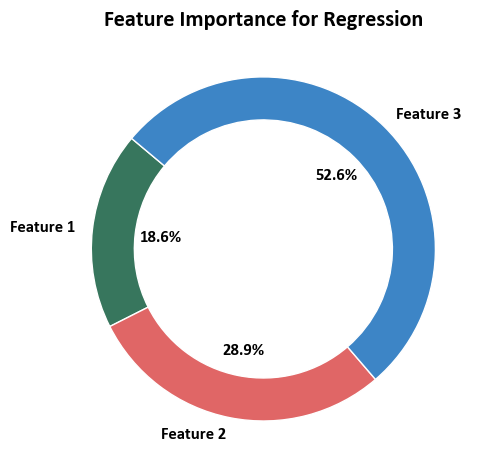

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Generate synthetic data for regression
np.random.seed(42)
X_regression = np.random.rand(100, 3)  # Features: 3 variables
y_regression = 2 * X_regression[:, 0] + 3 * X_regression[:, 1] + 4 * X_regression[:, 2] + np.random.randn(100)

# Create a bagged ensemble of decision trees for regression
base_model_regression = DecisionTreeRegressor()
bagging_model_regression = BaggingRegressor(base_model_regression, n_estimators=100, random_state=42)

# Train the bagging model
bagging_model_regression.fit(X_regression, y_regression)

# Calculate feature importance for regression
feature_importance_regression = np.mean([tree.feature_importances_ for tree in bagging_model_regression.estimators_], axis=0)

def print_bold(txt, c = 31):
    print(f"\033[1;{c}m" + txt + "\033[0m")
    
print_bold("Feature Importance for Regression:")
for i, importance in enumerate(feature_importance_regression):
    print(f"\t - Feature {i + 1}: {importance:.4f}")
    
labels = [f"Feature {i + 1}" for i in range(len(feature_importance_regression))]

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(feature_importance_regression, labels=labels, autopct='%1.1f%%', startangle=140,
       colors = ['#37765D', '#e06666','#3d85c6'],
       wedgeprops=dict(width=0.25, edgecolor='w'),
       textprops = {'fontsize': 12, 'weight': 'bold', 'color': 'black'})
ax.set_title('Feature Importance for Regression', fontsize=16, weight='bold')

plt.tight_layout()

Here's an interpretation (of our fictional dataset!):

1. **Feature 1 (Square Footage):** This feature has an importance score of approximately 18.55%. It suggests that square footage contributes moderately to the prediction of house prices. An increase or decrease in square footage will have a noticeable but not overwhelming impact on the predicted house price.

2. **Feature 2 (Number of Bedrooms):** With an importance score of approximately 28.86%, the number of bedrooms is more influential than square footage. Changes in the number of bedrooms will have a relatively stronger impact on the predicted house price compared to square footage.

3. **Feature 3 (Location):** This feature holds the highest importance with a score of approximately 52.59%. It indicates that the location of the house significantly influences the predicted price. Changes in the location, which might encompass various factors such as neighborhood, amenities, or proximity to certain areas, play a crucial role in determining house prices.